# PCA- Principal Component Analysis

- its for unsupervised learning technique

- but it is  not restricted to supervised learning



# Math Steps


1. Take the whole dataset consisting of d+1 dimensions and ignore the labels such that our new dataset becomes d dimensional.

2.Compute the mean for every dimension of the whole dataset.


3.Compute the covariance matrix of the whole dataset.


4. Compute eigenvectors and the corresponding eigenvalues.

5.Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d × k dimensional matrix W.

6.Use this d × k eigenvector matrix to transform the samples onto the new subspace.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('winequality-red.csv')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data=data.drop('quality',axis=1)

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2


In [10]:
data.shape

(1593, 11)

# Apply scalling to normalize the data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sc_data=scaler.fit_transform(data)

In [12]:
sc_data

array([[-0.52832387,  0.96236651, -1.39678338, ...,  1.28957439,
        -0.58157329, -0.96261979],
       [-0.29867112,  1.9673339 , -1.39678338, ..., -0.71815133,
         0.12608775, -0.58738269],
       [-0.29867112,  1.29735564, -1.19106736, ..., -0.32955926,
        -0.05082751, -0.58738269],
       ...,
       [-1.15986893, -0.09843241, -0.72820631, ...,  0.70668628,
         0.53889003,  0.53832862],
       [-1.38952168,  0.65529314, -0.77963531, ...,  1.67816647,
         0.30300301, -0.21214558],
       [-1.3321085 , -1.21506285,  1.02037988, ...,  0.51239024,
         0.00814425,  0.53832862]])

In [14]:
df=pd.DataFrame(data=sc_data,columns=data.columns)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528324,0.962367,-1.396783,-0.454827,-0.244523,-0.466340,-0.379532,0.557949,1.289574,-0.581573,-0.962620
1,-0.298671,1.967334,-1.396783,0.041214,0.222279,0.870290,0.622659,0.028535,-0.718151,0.126088,-0.587383
2,-0.298671,1.297356,-1.191067,-0.171375,0.094970,-0.084446,0.227856,0.134418,-0.329559,-0.050828,-0.587383
3,-0.470911,-0.154264,0.454661,2.521419,-0.350615,0.106501,1.685588,0.557949,0.253329,0.833749,0.069282
4,-0.930216,0.292388,-0.985351,-0.525690,0.201061,-0.084446,0.561920,-0.447939,-0.200029,-0.699517,-1.150238


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1593.0,3.656139e-16,1.000314,-2.135893,-0.700563,-0.241258,0.505114,4.351797
volatile acidity,1593.0,-4.934325e-17,1.000314,-2.275862,-0.768411,-0.042601,0.627377,5.875540
citric acid,1593.0,-3.208705e-16,1.000314,-1.396783,-0.882493,-0.059629,0.763235,3.746117
residual sugar,1593.0,7.317854e-17,1.000314,-1.163456,-0.454827,-0.242238,0.041214,9.182540
chlorides,1593.0,2.707955e-16,1.000314,-1.602495,-0.371833,-0.180868,0.052533,11.107274
free sulfur dioxide,1593.0,-6.286385e-17,1.000314,-1.421077,-0.848235,-0.179920,0.488396,5.357551
total sulfur dioxide,1593.0,-6.091242e-17,1.000314,-1.229875,-0.743965,-0.258054,0.470812,7.364668
density,1593.0,-1.712197e-14,1.000314,-3.534427,-0.606763,0.002064,0.579126,3.676203
pH,1593.0,8.604403e-16,1.000314,-3.697357,-0.653386,-0.005733,0.577156,4.527842
sulphates,1593.0,-5.786996e-16,1.000314,-1.937924,-0.640545,-0.227743,0.420947,7.910359


# Apply PCA 

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
df_pca=pca.fit(df)

In [17]:
pca.explained_variance_

array([3.09961758, 1.92914238, 1.54846089, 1.21504035, 0.95884555,
       0.66011495, 0.58518063, 0.42396495, 0.34514225, 0.18183333,
       0.05956669])

In [18]:
pca.explained_variance_ratio_

array([0.28160653, 0.17526649, 0.1406808 , 0.11038887, 0.08711306,
       0.05997278, 0.05316484, 0.03851807, 0.03135687, 0.01651993,
       0.00541175])

# Plot the explained variance ratio

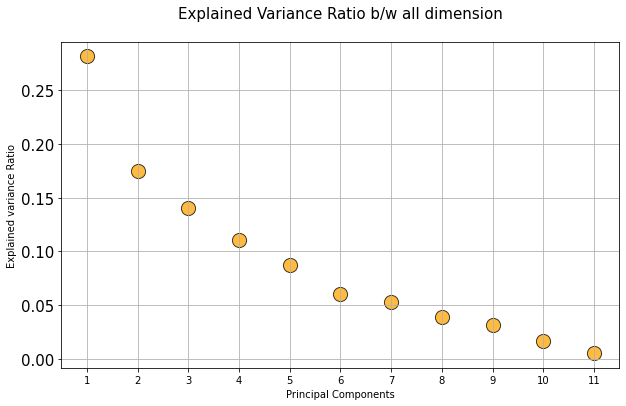

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df_pca.explained_variance_ratio_))],
             y=df_pca.explained_variance_ratio_,s=200,alpha=0.75,c='orange',edgecolors='k')
plt.grid(True)
plt.title('Explained Variance Ratio b/w all dimension\n',fontsize=15)
plt.xlabel('Principal Components')
plt.xticks([i+1 for i in range(len(df_pca.explained_variance_ratio_))])
plt.yticks(fontsize=15)
plt.ylabel('Explained variance Ratio')
plt.show()

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
reduced_data=pca.fit_transform(df)

In [29]:
pca.explained_variance_

array([3.09961758, 1.92914238, 1.54846089, 1.21504035, 0.95884555])

In [30]:
pca.explained_variance_ratio_

array([0.28160653, 0.17526649, 0.1406808 , 0.11038887, 0.08711306])

In [28]:
reduced_data

array([[-1.61698612,  0.45331271, -1.78060141,  0.0443785 ,  0.06190178],
       [-0.80068536,  1.85707805, -0.92010875,  0.54719387, -0.02089663],
       [-0.74875478,  0.88382276, -1.17822833,  0.41072518, -0.0467258 ],
       ...,
       [-1.4625567 ,  0.31032138,  1.11449433,  0.49067   ,  0.19538093],
       [-2.27429819,  0.97794142,  0.61726471,  0.63934025,  0.06926724],
       [-0.43402985, -0.53834661,  1.6223064 , -0.39415212,  0.4484562 ]])

# Kmeans Algorithm

In [39]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
km.fit(reduced_data)
label=km.labels_
from sklearn.metrics import silhouette_score
print('Silhouette_score\n')
print(silhouette_score(reduced_data,label))

Silhouette_score

0.26100485461961664


In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
reduced_data1=pca.fit_transform(df)
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
km.fit(reduced_data1)
label=km.labels_
from sklearn.metrics import silhouette_score
print('Silhouette_score\n')
print(silhouette_score(reduced_data1,label))

Silhouette_score

0.2912487509595766


# Without PCA- Kmeans performance

In [44]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
km.fit(data)
label=km.labels_
from sklearn.metrics import silhouette_score
print('Silhouette_score\n')
print(silhouette_score(data,label))

Silhouette_score

0.4856633508809746


# scalled data - Kmeans Performance

In [45]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
km.fit(df)
label=km.labels_
from sklearn.metrics import silhouette_score
print('Silhouette_score\n')
print(silhouette_score(df,label))

Silhouette_score

0.20494316060933612
